                            OLS Regression Results                            
Dep. Variable:            Crime Score   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     315.6
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        15:28:40   Log-Likelihood:                -2841.7
No. Observations:                4835   AIC:                             5707.
Df Residuals:                    4823   BIC:                             5785.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

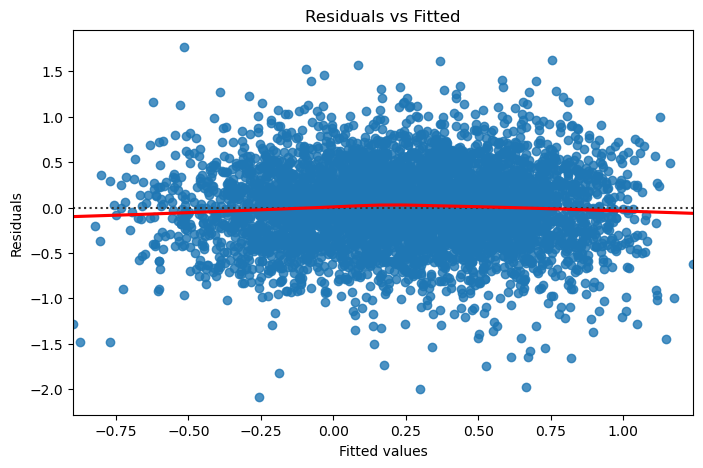

In [1]:

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged dataset
df = pd.read_csv("merged_lsoa_crime_data.csv")

# Define target and features
target = 'Crime Score'
features = [
    'Income Score (rate)', 'Employment Score (rate)', 
    'Education, Skills and Training Score', 'Health Deprivation and Disability Score',
    'Barriers to Housing and Services Score', 'Living Environment Score',
    'Children and Young People Sub-domain Score', 'Adult Skills Sub-domain Score',
    'Wider Barriers Sub-domain Score', 'Indoors Sub-domain Score', 'Outdoors Sub-domain Score'
]

# Drop rows with missing values
data = df[[target] + features].dropna()

# X and y
X = sm.add_constant(data[features])
y = data[target]

# OLS Regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Save summary to file
with open("regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

# Optional: plot residuals
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.savefig("residuals_plot.png")
plt.show()


**Title:** Crime Prediction Model - Regression Summary and Next Steps

**Prepared for:** Predictive Policing Model (London LSOAs)
**Prepared by:** Aleksandra Nowińska
**Date:** 12 May 2025

---

### 📊 Summary of Regression Results

**Target Variable:** Crime Score (from IMD dataset)

**Key Predictors Used:**

* Income and Employment scores
* Education and Skills
* Health deprivation
* Barriers to housing and services
* Indoor/Outdoor environment conditions
* Children and adult skills deprivation

**Model Type:** OLS Linear Regression

**Performance Metrics:**

* R-squared: 0.419 (42% of variance explained)
* F-statistic: 315.6, p < 0.001 (model is statistically significant)
* Most significant predictors:

  * Adult Skills Sub-domain
  * Health Deprivation
  * Children & Young People Score
  * Indoors and Outdoors Housing Quality
  * Employment Rate

**Diagnostics:**

* Residuals vs Fitted Plot: Generally well-distributed with mild heteroscedasticity
* Durbin-Watson: 1.53 (slight autocorrelation present)
* Multicollinearity: Potential concern (Condition number > 4000)

---

### 🔧 How To Use This Model

This regression identifies the key socioeconomic and housing features that relate to high crime risk. These features can be used as **predictors in an AI model** (e.g., Random Forest, XGBoost, or SARIMA with time components) to:

* Forecast **crime intensity** in small areas (LSOA-level)
* Support **time-based patrol deployment**
* Combine with external data (e.g., events, lighting, traffic) to refine predictions

---

### 📊 Next Steps for AI Model Development

1. **Feature Engineering**:

   * Normalize variables
   * Include time series data (monthly crime, holidays)
   * Integrate lighting, mobility, or climate datasets if available

2. **Model Selection**:

   * Try regularized regression (Ridge/Lasso)
   * Train non-linear models (XGBoost, Random Forest)
   * Consider SARIMA for spatiotemporal prediction

3. **Validation**:

   * K-Fold Cross Validation
   * Residual analysis for model bias
   * Compare models on R^2, RMSE, MAE

4. **Deployment Strategy**:

   * Create live map of LSOA scores
   * Design dashboard for police task force
   * Enable monthly/weekly refresh of input data

---

### 📂 Files You Can Use

* `merged_lsoa_crime_data.csv` — Full cleaned dataset
* `run_ols_regression.py` — Python script to run OLS in VS Code
* `regression_summary.txt` — (auto-generated after script run)
* `residuals_plot.png` — Visual diagnostic (optional output)

Let me know when you're ready to build the AI model. I can assist with feature scaling, tree-based models, or cross-validation frameworks.


In [2]:

"""
Crime Risk Modeling - Enhanced Analysis
Author: Aleksandra Nowińska
Purpose: Explore and predict crime scores using regression and AI approaches for London LSOAs
"""

# ===============================
# 📦 1. SETUP & DATA LOADING
# ===============================

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load the cleaned dataset
df = pd.read_csv("merged_lsoa_crime_data.csv")

# ===============================
# 🎯 2. VARIABLE SELECTION
# ===============================

# Define target and feature set
target = 'Crime Score'
features = [
    'Income Score (rate)', 'Employment Score (rate)', 
    'Education, Skills and Training Score', 'Health Deprivation and Disability Score',
    'Barriers to Housing and Services Score', 'Living Environment Score',
    'Children and Young People Sub-domain Score', 'Adult Skills Sub-domain Score',
    'Wider Barriers Sub-domain Score', 'Indoors Sub-domain Score', 'Outdoors Sub-domain Score'
]

# Drop NA values
data = df[[target] + features].dropna()
X = data[features]
y = data[target]

# Add constant for OLS
X_ols = sm.add_constant(X)

# ===============================
# 🧪 3. OLS REGRESSION
# ===============================

model = sm.OLS(y, X_ols).fit()
print(model.summary())

with open("regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

# ===============================
# 📉 4. OLS DIAGNOSTICS
# ===============================

# Residuals plot
plt.figure(figsize=(8,5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.savefig("residuals_plot.png")
plt.close()

# Histogram of residuals
plt.figure(figsize=(8,5))
sns.histplot(model.resid, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.savefig("residual_histogram.png")
plt.close()

# QQ Plot
plt.figure(figsize=(6,6))
qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.savefig("qq_plot.png")
plt.close()

# VIF (Multicollinearity)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.to_csv("vif_report.csv", index=False)

# ===============================
# 🌲 5. RANDOM FOREST REGRESSION
# ===============================

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Save results
with open("rf_model_metrics.txt", "w") as f:
    f.write(f"R²: {r2:.3f}\nMAE: {mae:.3f}\nRMSE: {rmse:.3f}")

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("rf_feature_importance.png")
plt.close()

# ===============================
# 🧠 6. CORRELATION HEATMAP
# ===============================

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.close()


                            OLS Regression Results                            
Dep. Variable:            Crime Score   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     315.6
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        15:39:19   Log-Likelihood:                -2841.7
No. Observations:                4835   AIC:                             5707.
Df Residuals:                    4823   BIC:                             5785.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<Figure size 600x600 with 0 Axes>